In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns
import itertools

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
print (df['Class'].value_counts(normalize=True))
print (df['Class'].value_counts())

0    0.998273
1    0.001727
Name: Class, dtype: float64
0    284315
1       492
Name: Class, dtype: int64


In [5]:

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

not_fraud = df[df['Class'] ==0][:492]
fraud= df[df['Class'] ==1]
X= df.drop(columns= 'Class', axis=1)
Y= df['Class']

print(Y.shape)
print(X.shape)

(284807,)
(284807, 30)


In [7]:
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.307413,-0.990214
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,7.084469,-0.989438
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,3.045204,-0.942563
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.517013,-0.912910
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.293440,-0.906648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.711928,1.547423,1.799759,2.489060,0.450497,1.073762,0.309374,0.450854,-1.560107,1.231356,...,-0.136653,0.052595,-0.327937,-0.531480,0.005533,0.515896,0.250372,0,-0.296933,-0.990789
488,1.106251,0.398625,0.860421,2.388862,-0.365843,-0.192568,-0.121769,0.150876,-0.733271,0.860900,...,-0.952836,0.181643,0.222462,0.083552,-0.342278,-0.017021,0.020976,0,-0.063858,-0.990778
489,-0.424666,0.554293,1.374234,-0.447451,0.288248,-1.082536,0.969035,-0.347446,-0.109678,-0.258587,...,0.103502,0.024513,0.425008,-0.227746,0.182264,0.076720,-0.098667,0,0.274436,-0.990778
490,1.261597,0.256346,0.513254,0.619054,-0.472482,-0.989342,0.065431,-0.208781,0.035924,-0.067307,...,-0.739810,0.135646,0.376418,0.220320,0.094706,-0.028559,0.019023,0,-0.289387,-0.990766


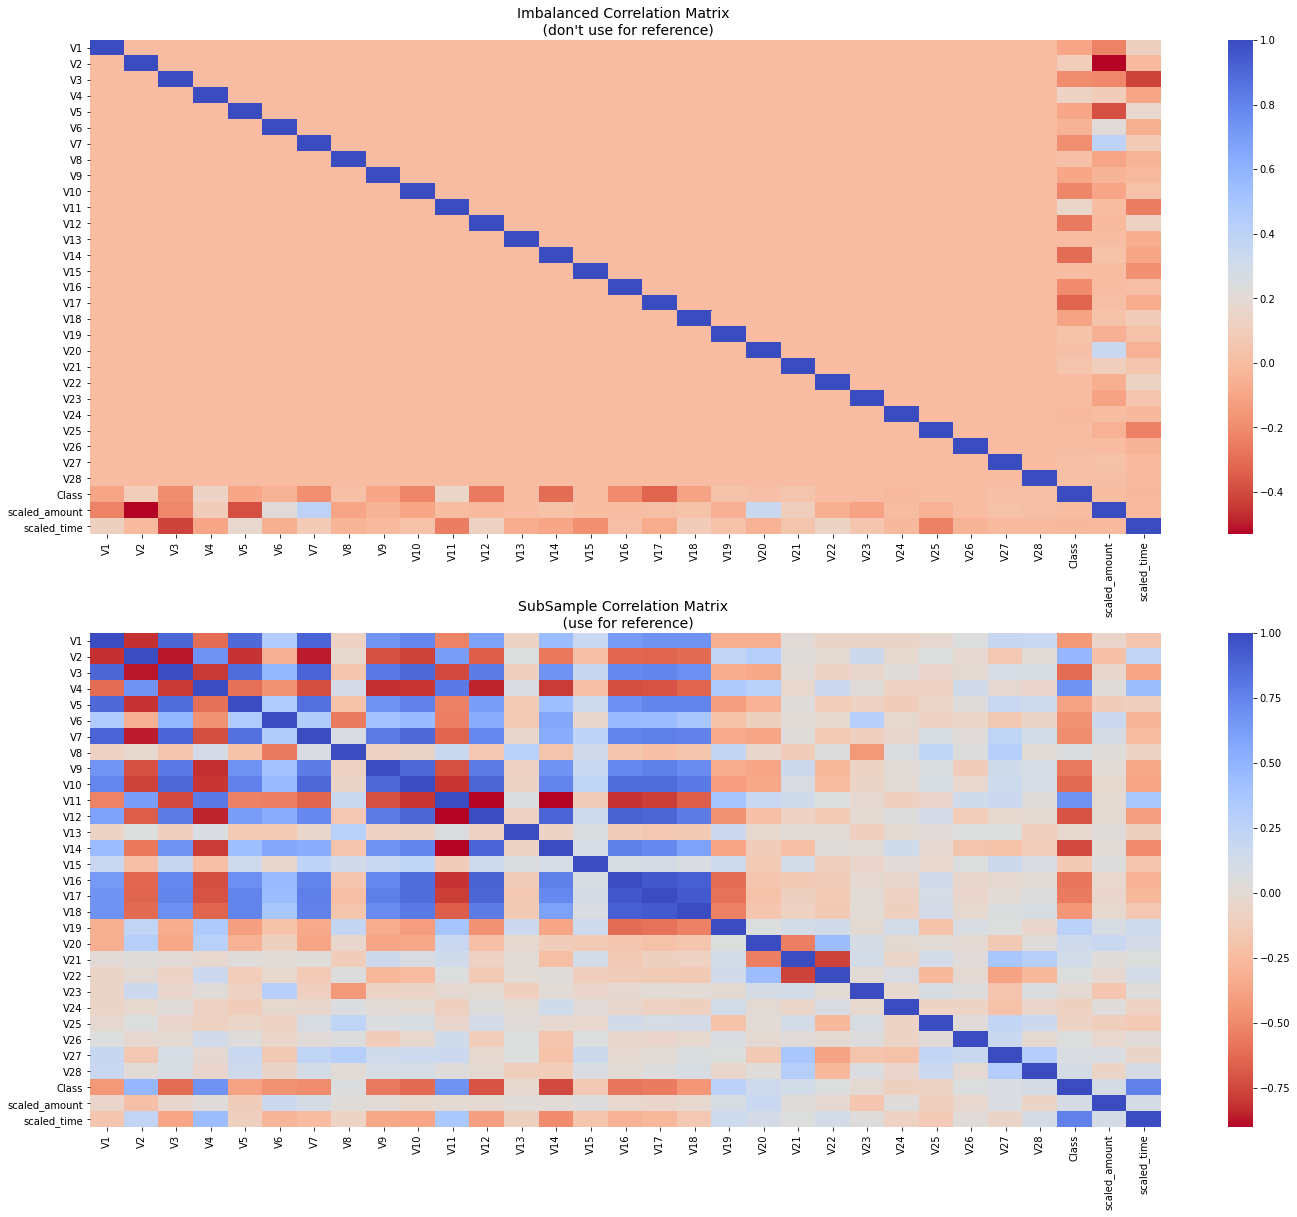

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()#use the subsample as the high level of imbalance will affect the correlation matrix

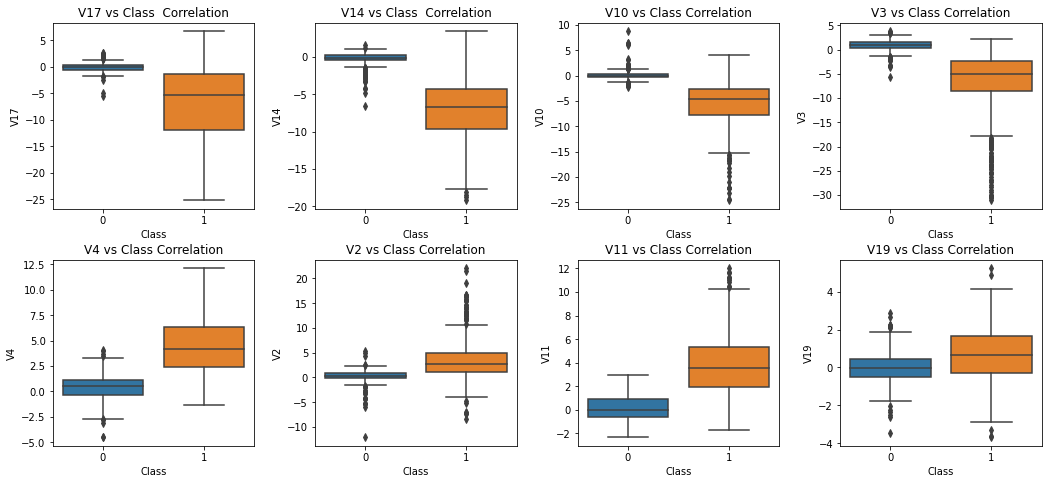

In [9]:
#observing the above figure, variavbles V17,,V14, V10, V11, V4, V2,V19 have a relatively strong correlation
# visualise the difference in class using boxplots 
#'V17','V14','V10','V3','V4','V2','V11','V19'
fig, axs = plt.subplots(2, 4, figsize=(15,7))
fig.tight_layout(pad=3)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axs[0,0])
axs[0,0].set_title('V17 vs Class  Correlation')
sns.boxplot(x="Class", y="V14", data=new_df, ax=axs[0,1])
axs[0,1].set_title('V14 vs Class  Correlation')
sns.boxplot(x="Class", y="V10", data=new_df, ax=axs[0,2])
axs[0,2].set_title('V10 vs Class Correlation')
sns.boxplot(x="Class", y="V3", data=new_df, ax=axs[0,3])
axs[0,3].set_title('V3 vs Class Correlation')
sns.boxplot(x="Class", y="V4", data=new_df, ax=axs[1,0])
axs[1,0].set_title('V4 vs Class Correlation')
sns.boxplot(x="Class", y="V2", data=new_df, ax=axs[1,1])
axs[1,1].set_title('V2 vs Class Correlation')
sns.boxplot(x="Class", y="V11", data=new_df, ax=axs[1,2])
axs[1,2].set_title('V11 vs Class Correlation')
sns.boxplot(x="Class", y="V19", data=new_df, ax=axs[1,3])
axs[1,3].set_title('V19 vs Class Correlation')

plt.show()

**Need to remove outliers to improve the ML models performance. There are multiple ways to achieve this, one being using std, however the data must be normally distributed which the below histograms show that the majority of variables are not.**

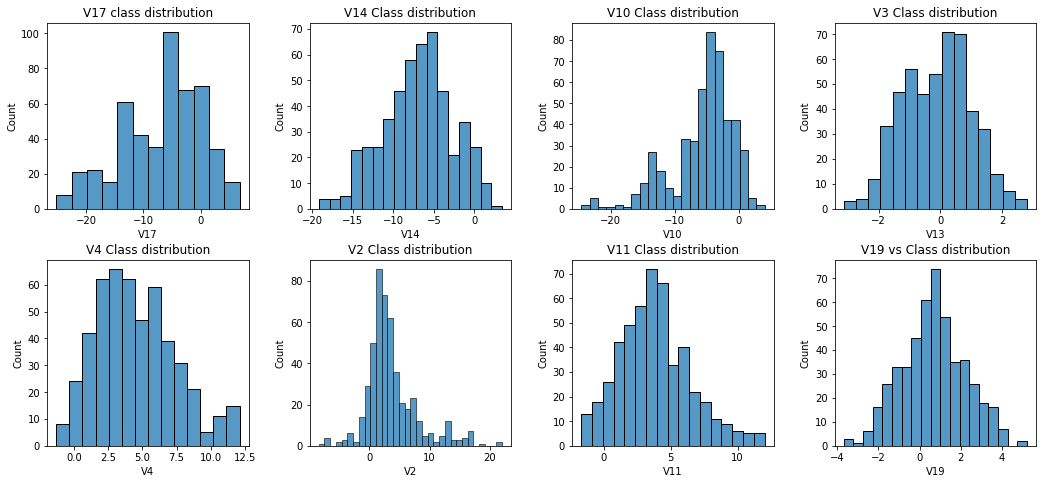

In [10]:
Class_1  =new_df.loc[new_df.Class ==1]
Class_0  =new_df.loc[new_df.Class ==0]

def histogram_plots(Class):
    fig, axs = plt.subplots(2, 4, figsize=(15,7))
    fig.tight_layout(pad=3)
    sns.histplot(x="V17", data=Class_1, ax=axs[0,0])
    axs[0,0].set_title('V17 class distribution')
    sns.histplot(x="V14", data=Class_1, ax=axs[0,1])
    axs[0,1].set_title('V14 Class distribution')
    sns.histplot(x="V10", data=Class_1, ax=axs[0,2])
    axs[0,2].set_title('V10 Class distribution')
    sns.histplot(x="V13", data=Class_1, ax=axs[0,3])
    axs[0,3].set_title('V3 Class distribution')
    sns.histplot(x="V4", data=Class_1, ax=axs[1,0])
    axs[1,0].set_title('V4 Class distribution')
    sns.histplot(x="V2", data=Class_1, ax=axs[1,1])
    axs[1,1].set_title('V2 Class distribution')
    sns.histplot(x="V11", data=Class_1, ax=axs[1,2])
    axs[1,2].set_title('V11 Class distribution')
    sns.histplot(x="V19", data=Class_1, ax=axs[1,3])
    axs[1,3].set_title('V19 vs Class distribution')

    return(plt.show())
histogram_plots(Class_0)

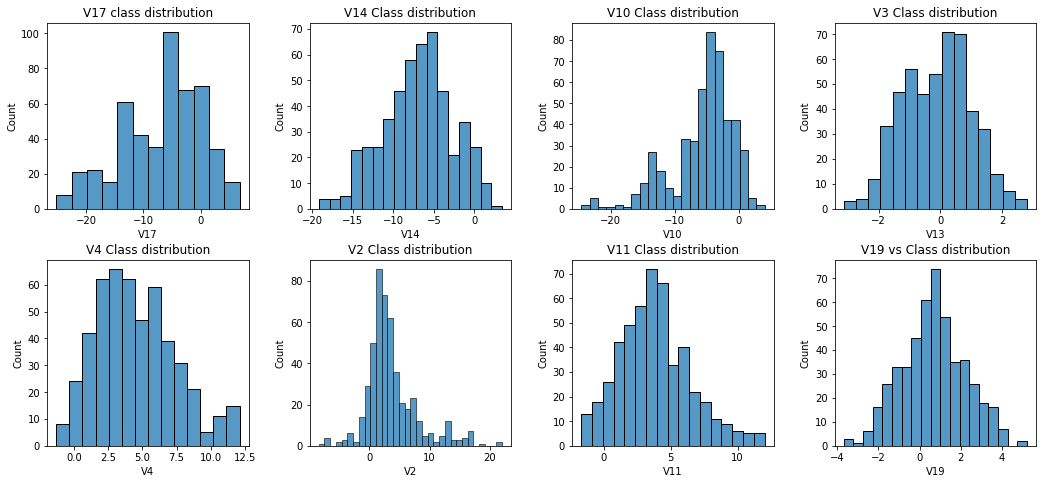

In [11]:
histogram_plots(Class_1)

**Based on research I conducted at 'https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/' the interqaurtile range should be utilised to remove outliers**

In [12]:
def remove_outliers(Class):
    
    variables = ['V17','V14','V10','V3','V4','V2','V11','V19']
    for i in variables:
        q25, q75 = np.percentile(Class[i], 25), np.percentile(Class[i], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5   #use a factor of 1.5 to remove outliers 
        lower, upper = q25 - cut_off, q75 + cut_off
        Class = Class[(Class[i] > lower) & (Class[i] < upper)]
    return (Class)
    
Class_1_no_outliers= remove_outliers(Class_1)
Class_0_no_outliers= remove_outliers(Class_0)
len(Class_0_no_outliers)

374

In [13]:
df_no_outliers_test= remove_outliers(df)
df_no_outliers_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.256131,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284800,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,0,-0.269964,1.034928
284801,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,0,-0.269825,1.034939
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975


In [14]:
len(Class_1_no_outliers)

391

In [15]:
df_no_outliers_train= Class_0_no_outliers 
df_no_outliers_train= df_no_outliers_train.append(Class_1_no_outliers)
df_no_outliers_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.256131,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,5.142178,0.992140
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1,-0.296793,0.994549
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,0.780968,0.994596
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,3.116048,1.001821


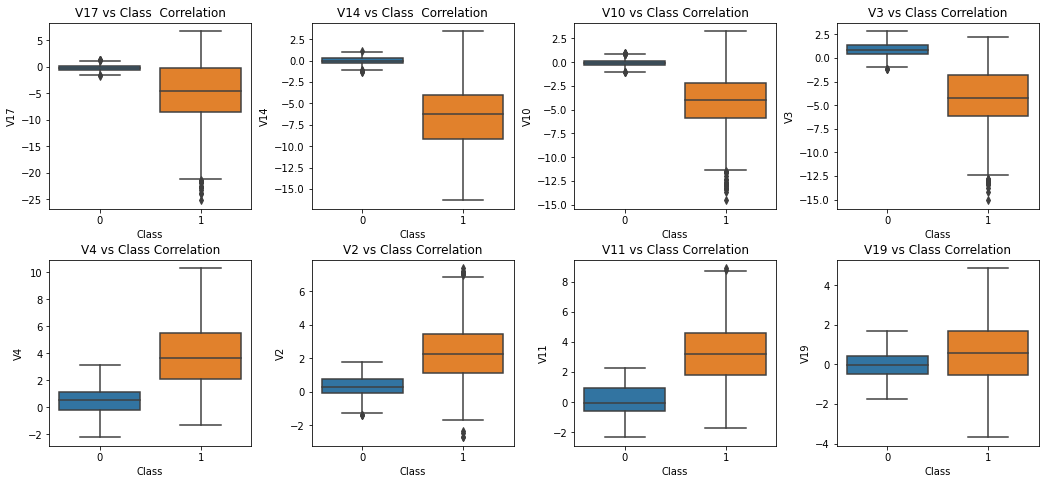

In [16]:

fig, axs = plt.subplots(2, 4, figsize=(15,7))
fig.tight_layout(pad=3)
sns.boxplot(x="Class", y="V17", data=df_no_outliers_train, ax=axs[0,0])
axs[0,0].set_title('V17 vs Class  Correlation')
sns.boxplot(x="Class", y="V14", data=df_no_outliers_train, ax=axs[0,1])
axs[0,1].set_title('V14 vs Class  Correlation')
sns.boxplot(x="Class", y="V10", data=df_no_outliers_train, ax=axs[0,2])
axs[0,2].set_title('V10 vs Class Correlation')
sns.boxplot(x="Class", y="V3", data=df_no_outliers_train, ax=axs[0,3])
axs[0,3].set_title('V3 vs Class Correlation')
sns.boxplot(x="Class", y="V4", data=df_no_outliers_train, ax=axs[1,0])
axs[1,0].set_title('V4 vs Class Correlation')
sns.boxplot(x="Class", y="V2", data=df_no_outliers_train, ax=axs[1,1])
axs[1,1].set_title('V2 vs Class Correlation')
sns.boxplot(x="Class", y="V11", data=df_no_outliers_train, ax=axs[1,2])
axs[1,2].set_title('V11 vs Class Correlation')
sns.boxplot(x="Class", y="V19", data=df_no_outliers_train, ax=axs[1,3])
axs[1,3].set_title('V19 vs Class Correlation')

plt.show()

**Observing the length of the new dataframe and the above boxplots it is visible that there are fewer outliers**

In [17]:
df_no_outliers_train.Class.value_counts()

1    391
0    374
Name: Class, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
y = df_no_outliers_train['Class']
x = df_no_outliers_train.drop('Class', axis=1)
x =x[['V17','V14','V10','V3','V4','V2','V11','V19']]



X_train, X_test_, y_train, y_test_ = train_test_split(x, y, test_size=0.3, random_state=42)

df_no_outliers_test =df_no_outliers_test.sample(n=10000)
y_test = df_no_outliers_test['Class']#reuse the original data frame to test with 
X_test = df_no_outliers_test[['V17','V14','V10','V3','V4','V2','V11','V19']]
y_test = y_test.append(y_test_)
X_test = X_test.append(X_test_)


print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(535, 8)
(535,)
(10230, 8)
(10230,)


**I decided to test the model with a larger sample from the original dataset but also made sure to include cases of fraud**

**KNN**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

Recall score for KNN with 1 neighbours 0.8938053097345132
Recall score for KNN with 2 neighbours 0.8495575221238938
Recall score for KNN with 3 neighbours 0.8672566371681416
Recall score for KNN with 4 neighbours 0.8584070796460177
Recall score for KNN with 5 neighbours 0.8584070796460177
Recall score for KNN with 6 neighbours 0.8495575221238938
Recall score for KNN with 7 neighbours 0.8495575221238938
Recall score for KNN with 8 neighbours 0.8495575221238938
Recall score for KNN with 9 neighbours 0.8495575221238938
Recall score for KNN with 10 neighbours 0.8407079646017699
Recall score for KNN with 11 neighbours 0.8407079646017699


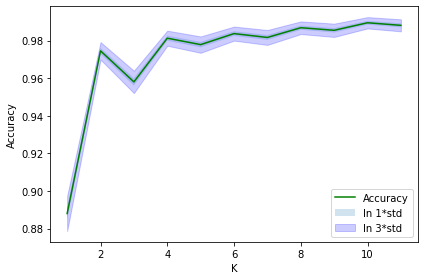

In [21]:
# Initialising Variables
k_to_try = 12
means = np.zeros((k_to_try-1))
stds = np.zeros((k_to_try-1))

# Fitting KNN Model for each k, saving down the mean and standard deviation of the accuracy
for i in range(1, k_to_try):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    predicted = knn.predict(X_test)
    means[i-1]=metrics.accuracy_score(y_test, predicted)
    stds[i-1]=np.std(predicted == y_test)/np.sqrt(predicted.shape[0])
    print ('Recall score for KNN with ' +str(i)+' neighbours', recall_score(y_test, predicted))

    
# Plotting accuracy along side +/- 1 and 3 stds
plt.plot(range(1, k_to_try), means, 'g')
plt.fill_between(range(1, k_to_try), means-1*stds, means+1*stds, alpha=0.2)
plt.fill_between(range(1, k_to_try), means-3*stds, means+3*stds, alpha=0.2, color="blue")
plt.legend(('Accuracy', 'In 1*std', 'In 3*std'))
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
def con_mat_plot(matrix, classes, type_of_svm):
    # matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix of ' + str(type_of_svm))
    plt.colorbar()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes, rotation=50)
    plt.yticks(ticks, classes)
    threshold = matrix.max()/2.
    
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], '.2f'), horizontalalignment="center", 
                 color="white" if matrix[i, j] > threshold else "black")
    
    
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

**SVM**

In [23]:

def sup_vect_mach(kernel_,X_train, y_train,X_test,y_test):
    svm = SVC(
        C=1,
        random_state=42,
        kernel=kernel_)
    svm.fit(X_train, y_train)
    ans_svm= svm.predict(X_test)
    print ('F1 score for support vector machine: ', f1_score(y_test, ans_svm, average= 'weighted'))
    print ('Recall score for support vector machine: ', recall_score(y_test, ans_svm ))
    print ('Precision score for support vector machine: ', precision_score(y_test, ans_svm))

    matrix = confusion_matrix(y_test, ans_svm, labels=[0, 1])
    
    tn, fp, fn, tp = matrix.ravel()

    return(con_mat_plot(matrix, [0, 1], kernel_ +' svm'))
    return (tn, fp, fn, tp)


F1 score for support vector machine:  0.9841280058951947
Recall score for support vector machine:  0.8495575221238938
Precision score for support vector machine:  0.3368421052631579


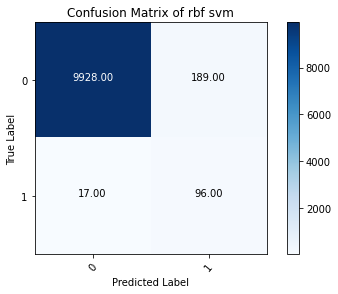

In [24]:
rbf = sup_vect_mach('rbf',X_train, y_train,X_test,y_test)
rbf

F1 score for support vector machine:  0.9617193439774084
Recall score for support vector machine:  0.8672566371681416
Precision score for support vector machine:  0.14432989690721648


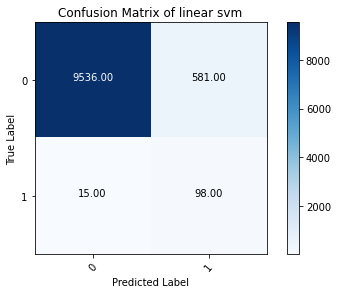

In [25]:
linear = sup_vect_mach('linear',X_train, y_train,X_test,y_test)
linear

In [26]:
from sklearn.tree import DecisionTreeClassifier 
Drugtree = DecisionTreeClassifier(criterion= 'entropy',max_depth=5)

def DTC(X_train, y_train,X_test,y_test):
    Drugtree.fit(X_train, y_train)
    ans_tree= Drugtree.predict(X_test)
    print('F1 score for Decision Tree: ', f1_score(y_test, ans_tree, average= 'weighted'))
    print ('Recall score for Decision Tree: ', recall_score(y_test, ans_tree ))
    print ('Precision score for Decision Tree: ', precision_score(y_test, ans_tree))
    
    matrix = confusion_matrix(y_test, ans_tree, labels=[0, 1])

    return(con_mat_plot(matrix, [0, 1], 'Decision Tree Classifier'))

F1 score for Decision Tree:  0.8292684103851581
Recall score for Decision Tree:  0.8672566371681416
Precision score for Decision Tree:  0.03366540707660598


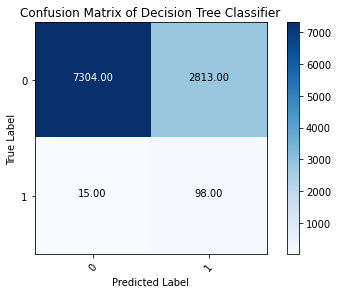

In [27]:
DecTree = DTC(X_train, y_train, X_test,y_test)
DecTree

In [28]:
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression()
def logistic_reg(X_train, y_train,X_test,y_test):
    log_regr.fit(X_train, y_train)
    ans= log_regr.predict(X_test)
    print ('F1 score for logistic regression: ', f1_score(y_test, ans, average= 'weighted'))
    print ('Recall score for logistic regression: ', recall_score(y_test, ans ))
    print ('Precision score for logistic regression: ', precision_score(y_test, ans))
    
    
    matrix = confusion_matrix(y_test, ans, labels=[0, 1])

    return(con_mat_plot(matrix, [0, 1], 'Decision Tree Classifier'))



F1 score for logistic regression:  0.9586790056381462
Recall score for logistic regression:  0.8938053097345132
Precision score for logistic regression:  0.13630229419703105


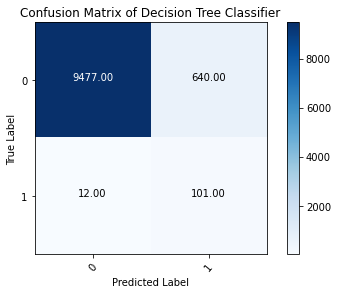

In [29]:
LR = logistic_reg(X_train, y_train,X_test,y_test)
LR

**Logistic regression performs the best so far as it has a recall of over 90%**

In [30]:

x= df.drop(columns= 'Class', axis=1)
y= df['Class']

sm=SMOTE(random_state=42)
X_smote,Y_smote = sm.fit_resample(x,y)
X_smote = X_smote#[:20000]
Y_smote = Y_smote#[:20000]

<AxesSubplot:>

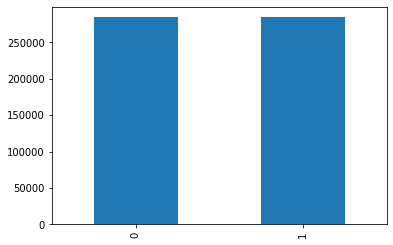

In [31]:
Y_smote.value_counts().plot.bar()

In [32]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,Y_smote, test_size=0.3, random_state=42)


F1 score for Decision Tree:  0.9429027687371838
Recall score for Decision Tree:  0.8968398876404494
Precision score for Decision Tree:  0.9883145023990094


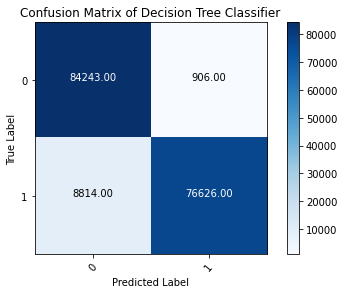

In [33]:
DecTree = DTC(X_train_smote, y_train_smote, X_test_smote,y_test_smote)
DecTree

**The Decisions Tree's F1 score has improved sligthly with the use of SMOTE**

c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 score for logistic regression:  0.9496888909367625
Recall score for logistic regression:  0.9236189138576779
Precision score for logistic regression:  0.9746680664484654


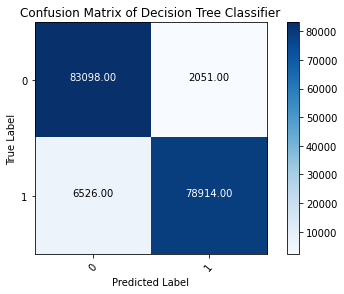

In [34]:
LR_smote = logistic_reg(X_train_smote, y_train_smote, X_test_smote,y_test_smote)
LR_smote

**Logistic Regression shows an even better enhancement of recall with a raise of roughly 3%**

In [35]:
import tensorflow as tf

In [36]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

In [59]:
number_of_features = X_train.shape[1]

network = models.Sequential()

network.add(layers.Dense(units=30, activation="relu", input_dim=number_of_features,kernel_regularizer=regularizers.l2(0.1)))
network.add(layers.Dense(units=40, activation="relu",kernel_regularizer=regularizers.l2(0.1)))
network.add(layers.Dense(units=25, activation="relu",kernel_regularizer=regularizers.l2(0.1)))
network.add(layers.Dense(units=1, activation="sigmoid"))

network.compile(loss="binary_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metri

In [60]:
X_train = np.array(X_train)
y_t=np.array(y_train)
X_test = np.array(X_test)
y_tes = np.array(y_test)

In [61]:
history = network.fit(x= X_train,y =  y_t, epochs=30, verbose=1,validation_data = (X_test, y_tes)) # Test data

Epoch 1/30
17/17 [==============================] - 3s 70ms/step - loss: 7.9434 - accuracy: 0.6871 - val_loss: 7.0299 - val_accuracy: 0.5291
Epoch 2/30
17/17 [==============================] - 0s 31ms/step - loss: 6.5059 - accuracy: 0.8214 - val_loss: 5.9628 - val_accuracy: 0.7149
Epoch 3/30
17/17 [==============================] - 0s 25ms/step - loss: 5.4822 - accuracy: 0.9255 - val_loss: 5.0295 - val_accuracy: 0.8699
Epoch 4/30
17/17 [==============================] - 0s 26ms/step - loss: 4.6161 - accuracy: 0.9627 - val_loss: 4.2213 - val_accuracy: 0.9315
Epoch 5/30
17/17 [==============================] - 0s 26ms/step - loss: 3.8528 - accuracy: 0.9475 - val_loss: 3.5002 - val_accuracy: 0.9723
Epoch 6/30
17/17 [==============================] - 0s 27ms/step - loss: 3.2031 - accuracy: 0.9323 - val_loss: 2.8573 - val_accuracy: 0.9940
Epoch 7/30
17/17 [==============================] - 0s 26ms/step - loss: 2.6106 - accuracy: 0.9509 - val_loss: 2.3457 - val_accuracy: 0.9943
Epoch 8/30
17

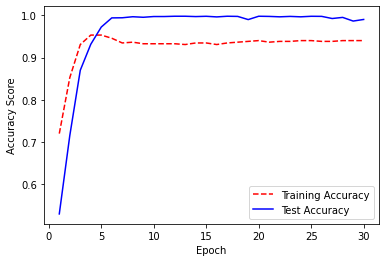

In [62]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

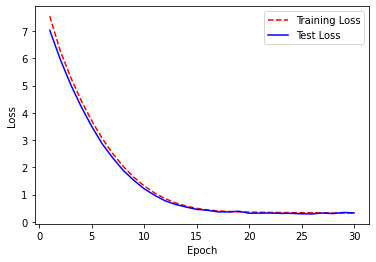

In [63]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [64]:
yhat_classes = network.predict_classes(X_test, verbose=0)

c:\users\finla\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [65]:
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)

Recall: 0.840708
